<a href="https://colab.research.google.com/github/Sakshi-Pingale/-LGMVIP-DataScience/blob/main/advance_level_1_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a neural network that can read handwriting

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical


In [ ]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to have a single channel (grayscale) and add a channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])#rmsprop optimizer sparce categorical crossentopy

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
750/750 [==============================] - 62s 79ms/step - loss: 0.1787 - accuracy: 0.9442 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 2/5
750/750 [==============================] - 55s 73ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0439 - val_accuracy: 0.9866
Epoch 3/5
750/750 [==============================] - 55s 74ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 54s 72ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0459 - val_accuracy: 0.9868
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0340 - accuracy: 0.9891
Test Accuracy: 98.91%


1/1 [==============================] - 0s 159ms/step


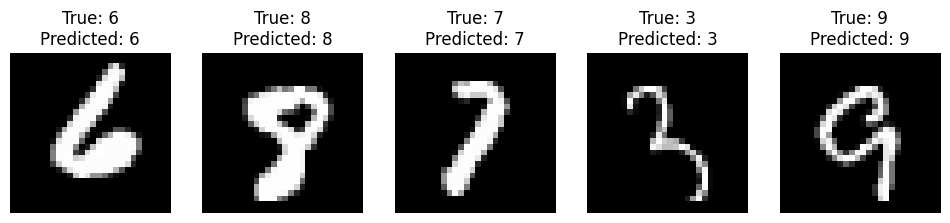

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


# Make predictions on a few test samples
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[random_indices]
sample_labels = np.argmax(y_test[random_indices], axis=1)
predictions = np.argmax(model.predict(sample_images), axis=1)

# Display the sample images with true and predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i, :, :, 0], cmap='gray')
    plt.title(f'True: {sample_labels[i]}\nPredicted: {predictions[i]}')
    plt.axis('off')

plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0